In [698]:
#importing all the necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [699]:
#Reading the CSV file
suicide_df=pd.read_csv("https://data.cdc.gov/api/views/9j2v-jamp/rows.csv?accessType=DOWNLOAD")
suicide_df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


In [700]:
suicide_df.shape

(6390, 13)

In [701]:
suicide_df.tail()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0,1.3,NaN
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0,4.1,NaN
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0,4.4,NaN
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0,3.2,NaN
6389,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 65 year...,7.235,2018,42,65 years and over,5.0,1.6,NaN


In [702]:
#column names in the csv
suicide_df.columns

Index(['INDICATOR', 'UNIT', 'UNIT_NUM', 'STUB_NAME', 'STUB_NAME_NUM',
       'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM', 'AGE', 'AGE_NUM',
       'ESTIMATE', 'FLAG'],
      dtype='object')

In [703]:
#Checking the data types 
print(suicide_df.dtypes)

INDICATOR          object
UNIT               object
UNIT_NUM            int64
STUB_NAME          object
STUB_NAME_NUM       int64
STUB_LABEL         object
STUB_LABEL_NUM    float64
YEAR                int64
YEAR_NUM            int64
AGE                object
AGE_NUM           float64
ESTIMATE          float64
FLAG               object
dtype: object


Checking duplicates

In [704]:
#Fetching the duplicates 
duplicate_value_df = suicide_df[suicide_df.duplicated()]
print("number of duplicates: ", duplicate_value_df.shape)

number of duplicates:  (0, 13)


There are no duplicate rows  to drop

In [705]:
suicide_df.count()

INDICATOR         6390
UNIT              6390
UNIT_NUM          6390
STUB_NAME         6390
STUB_NAME_NUM     6390
STUB_LABEL        6390
STUB_LABEL_NUM    6390
YEAR              6390
YEAR_NUM          6390
AGE               6390
AGE_NUM           6390
ESTIMATE          5484
FLAG               906
dtype: int64

In [706]:
# Missing values in each column
print(suicide_df.isnull().sum())

INDICATOR            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE           906
FLAG              5484
dtype: int64


From the above result we can observe ESTIMATE and FLAG have null values.This is the reason in the above step while counting ESTIMATE and FLAG had 5484 and 906 over 6380.

Dropping the flag column as it has many null/Blank values

In [707]:
#Dropping missing values 
suicide_df.drop(['FLAG'],axis=1,inplace=True)

In [708]:
#Checking the dataset whether flag column is deleted or not
suicide_df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3


## Identifying and dealing with the outliers

In [709]:
#summary statistics for each column of the DataFrame
suicide_df.describe()

,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,5484.000000
mean,1.872926,4.621909,4.686775,1997.525822,22.692019,2.712207,13.709810
std,0.333081,2.031777,1.829624,14.937451,12.286033,1.932280,11.531805
min,1.000000,0.000000,0.000000,1950.000000,1.000000,0.000000,0.300000
25%,2.000000,3.000000,3.230000,1988.000000,12.000000,0.000000,5.000000
50%,2.000000,5.000000,5.125100,1999.000000,23.000000,3.000000,10.500000
75%,2.000000,6.000000,6.153000,2009.000000,33.000000,4.100000,19.500000
max,2.000000,11.000000,7.235000,2018.000000,42.000000,6.000000,74.800000


Estimate has max value 74.80000 and min value 0.300000 which is a big range and  mean is around 13.7098 . 74.8000 Probably is some wrong value. We don’t know that yet! But, something seems definitely wrong! Let’s analyze this and see if we can get rid of the outliers if any.

Let's create a box plot to find out the outliers

<Axes: >

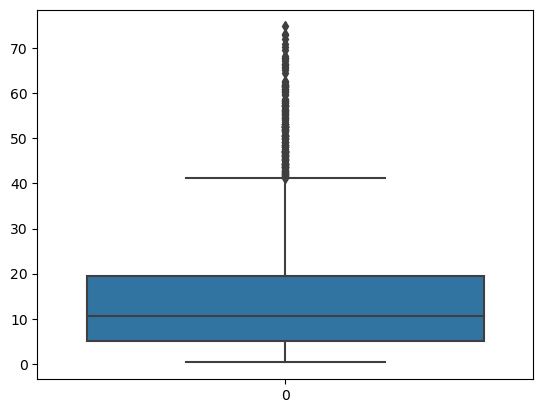

In [710]:
sns.boxplot(suicide_df['ESTIMATE']) 

This plot clearly shows that the values mostly lie in 0–40 range and we can safely drop values more than 40 which can introduce unnecessary bias.

Let's filter out the values below 40

In [711]:
suicide_df = suicide_df[(suicide_df['ESTIMATE'] < 40)]
suicide_df.describe()

,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000
mean,1.863094,4.378906,4.451097,1999.930506,24.608786,2.566540,12.262924
std,0.343781,2.068011,1.856757,13.401107,11.611953,1.882761,8.881446
min,1.000000,0.000000,0.000000,1950.000000,1.000000,0.000000,0.300000
25%,2.000000,3.000000,3.151000,1991.000000,15.000000,0.000000,4.800000
50%,2.000000,5.000000,5.113000,2002.000000,26.000000,3.000000,10.000000
75%,2.000000,6.000000,6.130000,2011.000000,35.000000,4.000000,17.900000
max,2.000000,11.000000,7.235000,2018.000000,42.000000,6.000000,39.800000


## understanding the relationship between the columns

In [712]:
suicide_df.columns

Index(['INDICATOR', 'UNIT', 'UNIT_NUM', 'STUB_NAME', 'STUB_NAME_NUM',
       'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM', 'AGE', 'AGE_NUM',
       'ESTIMATE'],
      dtype='object')

In [713]:
suicide_df['INDICATOR'].value_counts()

Death rates for suicide    5281
Name: INDICATOR, dtype: int64

There is only one value in the Indicator which filters out 'Death rate by suicide' which will not help in the analysis. So dropping the 'INDICATOR' column

In [714]:
suicide_df.drop(['INDICATOR'],axis=1,inplace=True) 
suicide_df.head()

,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2
1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5
2,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1
3,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2
4,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3


In [715]:
suicide_df['UNIT'].value_counts()

Deaths per 100,000 resident population, crude           4558
Deaths per 100,000 resident population, age-adjusted     723
Name: UNIT, dtype: int64

Update the text in the "UNIT" column's values 
By replacing 'Deaths per 100,000 resident population, crude' and 'Deaths per 100,000 resident population, age-adjusted' 
with 'crude' and 'age-adjusted,' respectively.This change is made to simplify and clarify the descriptions in the "UNIT" column.


In [716]:
suicide_df['UNIT'] = suicide_df['UNIT'].str.replace('Deaths per 100,000 resident population,', '')

In [717]:
#Adding title for the dataframe 
suicide_df=suicide_df.rename_axis("Deaths per 100,000 resident population")

In [718]:
#updating the UNIT column value text
suicide_df['UNIT'].value_counts()

 crude           4558
 age-adjusted     723
Name: UNIT, dtype: int64

In [719]:
suicide_df['UNIT_NUM'].value_counts()

2    4558
1     723
Name: UNIT_NUM, dtype: int64

From the above, we can understand that in unit column 'crude'= 2 and 'age-adjusted'= 1

I will use only one column for further analysis. Hence dropping the 'UNIT_NUM'

In [720]:
suicide_df.drop(['UNIT_NUM'],axis=1,inplace=True)

In [721]:
suicide_df.head()

,UNIT,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
"Deaths per 100,000 resident population",,,,,,,,,,
0,age-adjusted,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2
1,age-adjusted,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5
2,age-adjusted,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1
3,age-adjusted,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2
4,age-adjusted,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3


In [722]:
suicide_df['STUB_NAME'].value_counts()

Sex, age and race                                      1191
Sex and age                                            1099
Sex, age and race and Hispanic origin                   919
Sex and race                                            624
Age                                                     588
Sex and race and Hispanic origin                        512
Sex                                                     168
Total                                                    84
Sex, age and race and Hispanic origin (Single race)      37
Sex, age and race (Single race)                          25
Sex and race and Hispanic origin (Single race)           22
Sex and race (Single race)                               12
Name: STUB_NAME, dtype: int64

In [723]:
suicide_df['STUB_NAME_NUM'].value_counts()

5     1191
3     1099
7      919
4      624
1      588
6      512
2      168
0       84
11      37
9       25
10      22
8       12
Name: STUB_NAME_NUM, dtype: int64

From the above, we can understand that:

    STUB_NAME                                             STUB_NAME_NUM

    Sex, age and race                                  =    5 

    Sex, age and race and Hispanic origin              =    7  

    Sex and age                                        =    3

    Sex and race                                       =    4

    Sex and race and Hispanic origin                   =    6

    Age                                                =    1

    Sex                                                =    2

    Total                                              =    0

    Sex, age and race and Hispanic origin (Single race)=    11

    Sex, age and race (Single race)                    =    9

    Sex and race and Hispanic origin (Single race)     =    10

    Sex and race (Single race)                         =    8

I will use only one column for further analysis by dropping STUB_NAME_NUM 

In [724]:
suicide_df.drop(['STUB_NAME_NUM'],axis=1,inplace=True)
suicide_df.head()

,UNIT,STUB_NAME,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
"Deaths per 100,000 resident population",,,,,,,,,
0,age-adjusted,Total,All persons,0.0,1950,1,All ages,0.0,13.2
1,age-adjusted,Total,All persons,0.0,1960,2,All ages,0.0,12.5
2,age-adjusted,Total,All persons,0.0,1970,3,All ages,0.0,13.1
3,age-adjusted,Total,All persons,0.0,1980,4,All ages,0.0,12.2
4,age-adjusted,Total,All persons,0.0,1981,5,All ages,0.0,12.3


In [725]:
suicide_df['STUB_LABEL'].value_counts()

Female: Black or African American                                                       87
Female: White                                                                           86
Male: White                                                                             86
Male: Black or African American                                                         85
Male                                                                                    84
                                                                                        ..
Male: Not Hispanic or Latino: Native Hawaiian or Other Pacific Islander: 25-44 years     1
Female: Not Hispanic or Latino: Asian: 15-24 years                                       1
Female: Not Hispanic or Latino: Asian: 25-44 years                                       1
Female: Not Hispanic or Latino: Asian: 45-64 years                                       1
Female: Not Hispanic or Latino: Asian: 65 years and over                                 1

In [726]:
suicide_df['STUB_LABEL_NUM'].value_counts()

4.220    87
4.210    86
4.110    86
4.120    85
2.100    84
         ..
6.172     1
6.261     1
6.262     1
6.263     1
6.264     1
Name: STUB_LABEL_NUM, Length: 148, dtype: int64

From the above , we can observe "STUB_LABEL" and "STUB_LABEL_NUM" are same so dropping the STUB_LABEL_NAME

In [727]:
suicide_df.drop(['STUB_LABEL_NUM'],axis=1,inplace=True)

In [728]:
suicide_df.head()

,UNIT,STUB_NAME,STUB_LABEL,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
"Deaths per 100,000 resident population",,,,,,,,
0,age-adjusted,Total,All persons,1950,1,All ages,0.0,13.2
1,age-adjusted,Total,All persons,1960,2,All ages,0.0,12.5
2,age-adjusted,Total,All persons,1970,3,All ages,0.0,13.1
3,age-adjusted,Total,All persons,1980,4,All ages,0.0,12.2
4,age-adjusted,Total,All persons,1981,5,All ages,0.0,12.3


In [729]:
suicide_df['YEAR'].value_counts()

2018    250
2017    155
2015    155
2014    154
2008    154
2009    154
2016    154
2011    153
2010    152
2005    152
2013    151
2003    151
1999    150
2006    150
2012    149
2007    149
2004    149
2002    149
2001    149
2000    149
1996    118
1998    117
1995    116
1997    116
1994    115
1993    115
1992    114
1991    112
1988    110
1990    110
1989    110
1985    110
1986     97
1987     97
1980     88
1982     77
1981     77
1984     76
1983     75
1970     71
1960     66
1950     65
Name: YEAR, dtype: int64

In [730]:
suicide_df['YEAR_NUM'].value_counts()

42    250
41    155
39    155
38    154
32    154
33    154
40    154
35    153
34    152
29    152
37    151
27    151
23    150
30    150
36    149
31    149
28    149
26    149
25    149
24    149
20    118
22    117
19    116
21    116
18    115
17    115
16    114
15    112
12    110
14    110
13    110
9     110
10     97
11     97
4      88
6      77
5      77
8      76
7      75
3      71
2      66
1      65
Name: YEAR_NUM, dtype: int64

From the above we can observe YEAR and YEAR_NUM are same , so dropping the YEAR_NUM

In [731]:
suicide_df.drop(['YEAR_NUM'],axis=1,inplace=True)

In [732]:
suicide_df.head(10)

,UNIT,STUB_NAME,STUB_LABEL,YEAR,AGE,AGE_NUM,ESTIMATE
"Deaths per 100,000 resident population",,,,,,,
0,age-adjusted,Total,All persons,1950,All ages,0.0,13.2
1,age-adjusted,Total,All persons,1960,All ages,0.0,12.5
2,age-adjusted,Total,All persons,1970,All ages,0.0,13.1
3,age-adjusted,Total,All persons,1980,All ages,0.0,12.2
4,age-adjusted,Total,All persons,1981,All ages,0.0,12.3
5,age-adjusted,Total,All persons,1982,All ages,0.0,12.5
6,age-adjusted,Total,All persons,1983,All ages,0.0,12.4
7,age-adjusted,Total,All persons,1984,All ages,0.0,12.6
8,age-adjusted,Total,All persons,1985,All ages,0.0,12.5


In [733]:
suicide_df['AGE'].value_counts()

All ages             1422
25-44 years           684
45-64 years           657
15-24 years           653
65 years and over     534
65-74 years           209
75-84 years           159
15-19 years           126
20-24 years           126
25-34 years           126
35-44 years           126
45-54 years           126
55-64 years           125
10-14 years           124
85 years and over      84
Name: AGE, dtype: int64

In [734]:
suicide_df['AGE_NUM'].value_counts()

0.0    1422
3.0     684
4.0     657
2.0     653
5.0     534
5.1     209
5.2     159
2.1     126
2.2     126
3.1     126
3.2     126
4.1     126
4.2     125
1.0     124
6.0      84
Name: AGE_NUM, dtype: int64

From the above we can observe AGE and AGE_NUM are same

In [735]:
suicide_df.drop(['AGE_NUM'],axis=1,inplace=True)

In [736]:
suicide_df.head()

,UNIT,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE
"Deaths per 100,000 resident population",,,,,,
0,age-adjusted,Total,All persons,1950,All ages,13.2
1,age-adjusted,Total,All persons,1960,All ages,12.5
2,age-adjusted,Total,All persons,1970,All ages,13.1
3,age-adjusted,Total,All persons,1980,All ages,12.2
4,age-adjusted,Total,All persons,1981,All ages,12.3


In [737]:
suicide_df['ESTIMATE'].value_counts()

4.3     54
2.1     50
4.2     49
4.0     47
3.8     45
        ..
38.7     1
30.7     1
37.4     1
37.3     1
37.5     1
Name: ESTIMATE, Length: 388, dtype: int64

In [738]:
suicide_df.head()

,UNIT,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE
"Deaths per 100,000 resident population",,,,,,
0,age-adjusted,Total,All persons,1950,All ages,13.2
1,age-adjusted,Total,All persons,1960,All ages,12.5
2,age-adjusted,Total,All persons,1970,All ages,13.1
3,age-adjusted,Total,All persons,1980,All ages,12.2
4,age-adjusted,Total,All persons,1981,All ages,12.3


Now it looks eaiser to proceed with the analysis

## Who among the men and women commit more suicides

From the above we can observe that 'STUB_LABEL' has values 
"Female: Black or African American                                                       
Female: White                                                                          
Male: White                                                                             
Male: Black or African American                                                        
Male" etc . 

So, let's split the value by ':' and fetch the gender 



In [739]:
suicide_df['SEX'] = suicide_df['STUB_LABEL'].str.split(':').str[0]
filtered_df = suicide_df[(suicide_df['SEX'] == 'Female') | (suicide_df['SEX'] == 'Male')]
filtered_df.head()

,UNIT,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE,SEX
"Deaths per 100,000 resident population",,,,,,,
42,age-adjusted,Sex,Male,1950,All ages,21.2,Male
43,age-adjusted,Sex,Male,1960,All ages,20.0,Male
44,age-adjusted,Sex,Male,1970,All ages,19.8,Male
45,age-adjusted,Sex,Male,1980,All ages,19.9,Male
46,age-adjusted,Sex,Male,1981,All ages,19.8,Male


In [740]:
# Calculating the total sum of 'ESTIMATE'

# Sum of Estimates for male and female 
male_estimate = filtered_df[filtered_df['STUB_LABEL'] == 'Male']['ESTIMATE'].sum()
female_estimate = filtered_df[filtered_df['STUB_LABEL'] == 'Female']['ESTIMATE'].sum()

total_estimate= male_estimate + female_estimate

# Calculate the percentage for male and female
male_percentage = (male_estimate / total_estimate)*100
female_percentage = (female_estimate / total_estimate)*100


In [741]:
male_percentage

79.55463639861485

In [742]:
female_percentage

20.445363601385143

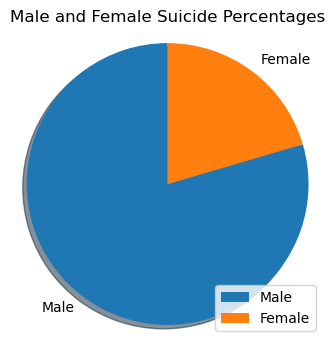

In [743]:
gender_labels = ['Male', 'Female']
gender_percentages = [male_percentage, female_percentage]

# Creating a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_percentages, labels=gender_labels,startangle=90,shadow = True)
plt.title('Male and Female Suicide Percentages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.legend(loc='lower right') 
plt.show()


Hence, it can be asserted that the suicide rate is higher among male for 79.55 of cases, in contrast to female
, who make up 20.44% of the total.


# At which age people are more susceptible to commit suicides 

In [744]:
suicide_df['AGE'].value_counts()

All ages             1422
25-44 years           684
45-64 years           657
15-24 years           653
65 years and over     534
65-74 years           209
75-84 years           159
15-19 years           126
20-24 years           126
25-34 years           126
35-44 years           126
45-54 years           126
55-64 years           125
10-14 years           124
85 years and over      84
Name: AGE, dtype: int64

Based on the preceding outcome, it is evident that the 'All Ages' value in the AGE column has a higher count, making it unadvisable to remove the 'All ages' value.

In [745]:

#Grouping the estimates by age
grouped_by_age = suicide_df.groupby('AGE')['ESTIMATE'].sum().reset_index() 

grouped_by_age.head(10)


,AGE,ESTIMATE
0,10-14 years,176.2
1,15-19 years,1089.7
2,15-24 years,7227.9
3,20-24 years,1733.5
4,25-34 years,1804.8
5,25-44 years,8941.2
6,35-44 years,1961.3
7,45-54 years,2151.5
8,45-64 years,8346.9
9,55-64 years,2045.3


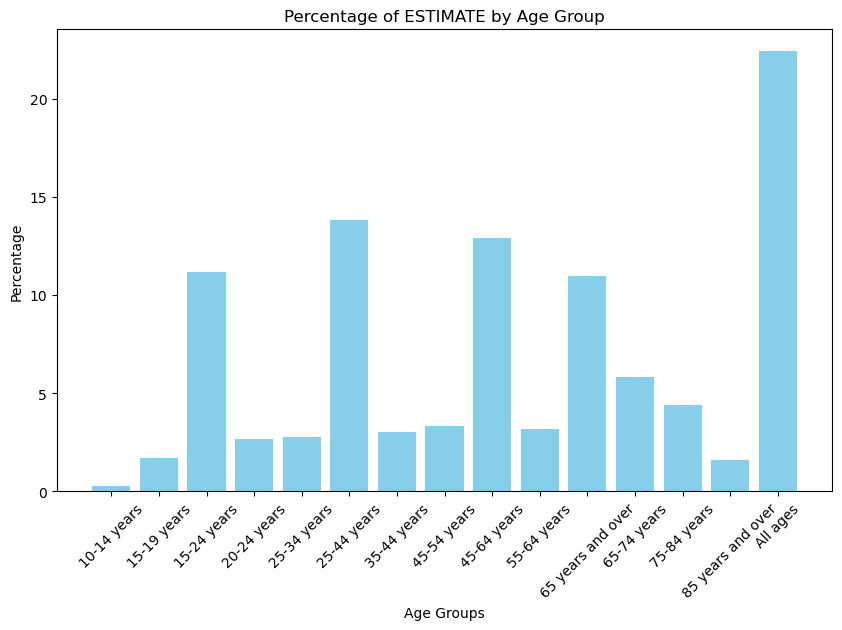

In [761]:
#Now calculating the percentage and plotting the bar graph 

grouped_by_age['Percentage'] = (grouped_by_age['ESTIMATE'] / total_estimate_sum) * 100 



ages = grouped_by_age['AGE']
percentage = grouped_by_age['Percentage']

# Creating a bar graph
plt.figure(figsize=(10, 6))
plt.bar(ages, percentage, color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
plt.title('Percentage of ESTIMATE by Age Group')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability


# Show the bar graph
plt.show()


 For instance,we can find that the 25-44 age group has a significantly higher suicide rate compared to others

In [762]:
grouped_by_age

,AGE,ESTIMATE,Percentage
0,10-14 years,176.2,0.272079
1,15-19 years,1089.7,1.682661
2,15-24 years,7227.9,11.160970
3,20-24 years,1733.5,2.676786
4,25-34 years,1804.8,2.786884
5,25-44 years,8941.2,13.806564
6,35-44 years,1961.3,3.028544
7,45-54 years,2151.5,3.322241
8,45-64 years,8346.9,12.888875
9,55-64 years,2045.3,3.158252


# In which year more number of suicides occur 

In [748]:


# Grouping the year and calculating the estimate
grouped_by_year = suicide_df.groupby('YEAR')['ESTIMATE'].sum().reset_index() 

#Calculating the percentage of the estimate for year 

# Calculate the total sum of 'ESTIMATE'
total_estimate_sum = grouped_by_year['ESTIMATE'].sum()

# Calculate the percentage for each year
grouped_by_year['Percentage'] = (grouped_by_year['ESTIMATE'] / total_estimate_sum) * 100



In [749]:
#Printing the percentage of every year 
for index, row in grouped_by_year.iterrows():
    year = row['YEAR']
    percentage = row['Percentage']
    print(f"Year {year}: {percentage:.2f}%")


Year 1950.0: 1.18%
Year 1960.0: 1.27%
Year 1970.0: 1.49%
Year 1980.0: 1.79%
Year 1981.0: 1.57%
Year 1982.0: 1.58%
Year 1983.0: 1.53%
Year 1984.0: 1.57%
Year 1985.0: 2.12%
Year 1986.0: 1.97%
Year 1987.0: 1.95%
Year 1988.0: 2.12%
Year 1989.0: 2.14%
Year 1990.0: 2.14%
Year 1991.0: 2.21%
Year 1992.0: 2.18%
Year 1993.0: 2.22%
Year 1994.0: 2.27%
Year 1995.0: 2.29%
Year 1996.0: 2.22%
Year 1997.0: 2.16%
Year 1998.0: 2.13%
Year 1999.0: 2.55%
Year 2000.0: 2.50%
Year 2001.0: 2.54%
Year 2002.0: 2.57%
Year 2003.0: 2.53%
Year 2004.0: 2.60%
Year 2005.0: 2.60%
Year 2006.0: 2.59%
Year 2007.0: 2.62%
Year 2008.0: 2.71%
Year 2009.0: 2.75%
Year 2010.0: 2.83%
Year 2011.0: 2.78%
Year 2012.0: 2.85%
Year 2013.0: 2.87%
Year 2014.0: 3.02%
Year 2015.0: 3.12%
Year 2016.0: 3.18%
Year 2017.0: 3.31%
Year 2018.0: 5.39%


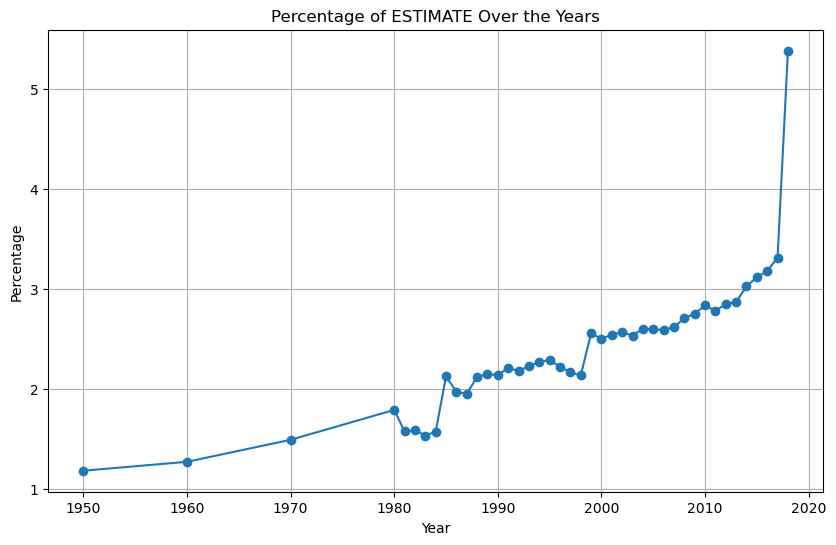

In [750]:


years = grouped_by_year['YEAR']
percentages = grouped_by_year['Percentage']

# Creating a line graph
plt.figure(figsize=(10, 6))
plt.plot(years, percentages, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of ESTIMATE Over the Years')

# Showing the line graph
plt.grid(True)
plt.show()


From the above instance we can observe that in 2018 there were more number od suicides

## Analysis of Suicide Estimates by Age Group and Year

In [751]:
gender_year_totals = suicide_df.groupby(['YEAR', 'AGE'])['ESTIMATE'].sum().reset_index()
gender_year_totals

,YEAR,AGE,ESTIMATE
0,1950,10-14 years,0.8
1,1950,15-19 years,8.0
2,1950,15-24 years,29.6
3,1950,20-24 years,18.8
4,1950,25-34 years,27.4
...,...,...,...
625,2018,65 years and over,382.7
626,2018,65-74 years,128.2
627,2018,75-84 years,81.9
628,2018,85 years and over,22.7


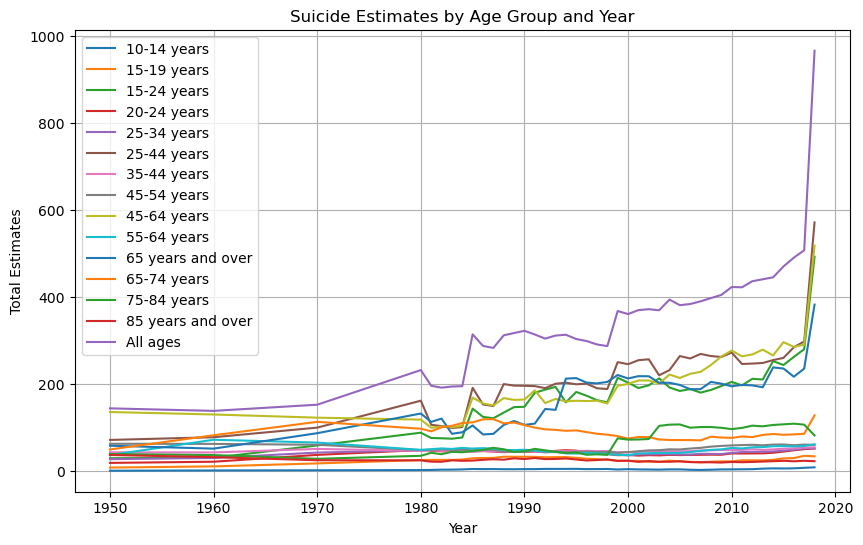

In [752]:
age_groups = gender_year_totals['AGE'].unique()

# Create a line plot for each age group
plt.figure(figsize=(10, 6))

for age_group in age_groups:
    data = gender_year_totals[gender_year_totals['AGE'] == age_group]
    plt.plot(data['YEAR'], data['ESTIMATE'], label=age_group)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Total Estimates')
plt.title('Suicide Estimates by Age Group and Year')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()








From the above we can say in 2018 there is significant rise in the suicidal rate especially in the age group 25-44,45-64,55-64

## Exploring Trends in Suicide Estimates by Category (UNIT and YEAR)

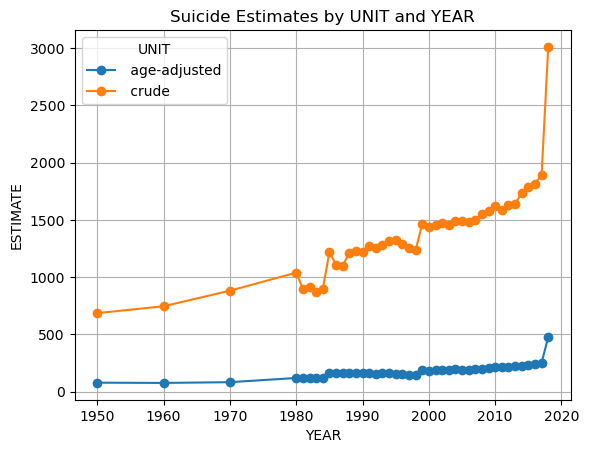

In [753]:

grouped_data = suicide_df.groupby(['UNIT', 'YEAR'])['ESTIMATE'].sum().unstack()

#Transpose the grouped data to have years on the x-axis
grouped_data = grouped_data.transpose()

# Plot the grouped data as a line graph
grouped_data.plot(kind='line', marker='o')

# Add labels and a title
plt.xlabel('YEAR')  # Set the x-axis label to 'YEAR'
plt.ylabel('ESTIMATE')
plt.title('Suicide Estimates by UNIT and YEAR')

# Display the plot
plt.legend(title='UNIT')
plt.grid(True)
plt.show()

In 2018, there's a striking increase in both 'age-adjusted' and 'crude' rates, with the 'crude' rate showing a substantial spike.

In [754]:
grouped_data

UNIT,age-adjusted,crude
YEAR,,
1950,77.6,685.4
1960,75.5,745.4
1970,81.9,881.7
1980,118.8,1038.7
1981,120.7,896.8
1982,115.6,909.9
1983,119.0,872.4
1984,117.4,898.7
1985,159.2,1215.6
